In [42]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline


In [4]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    return df

In [9]:
df = wrangle('C:/Users/Jojo/Downloads/archive (4)/heart_failure_clinical_records.csv')

In [10]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [14]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [15]:
#How many null values are there in our data
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<Axes: xlabel='age', ylabel='Density'>

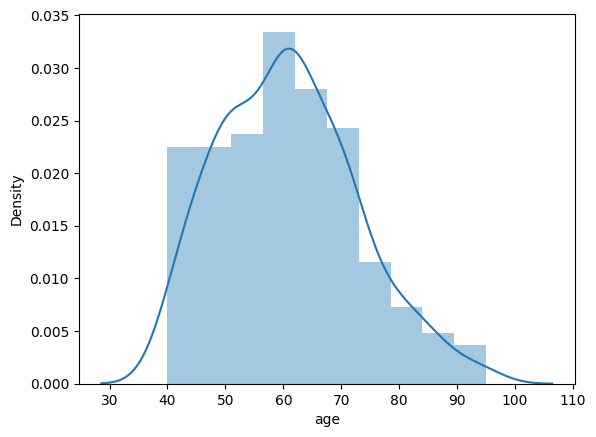

In [17]:
#Seeing the age distribution
sns.distplot(df['age'])

Total number of Living case:- 203
Total number of Death case:- 96


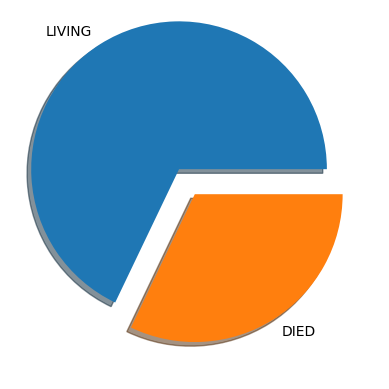

In [16]:
#A plot of living cases vs death cases
len_live = len(df['DEATH_EVENT'][df['DEATH_EVENT'] == 0])
len_death = len(df['DEATH_EVENT'][df['DEATH_EVENT'] == 1])

arr = np.array([len_live, len_death])
labels = ['LIVING','DIED']

print(f'Total number of Living case:- {len_live}')
print(f'Total number of Death case:- {len_death}')

plt.pie(arr, labels = labels, explode=[0.2,0.0], shadow = True)
plt.show()

Total number of Died:- 85
Total number of living:- 167


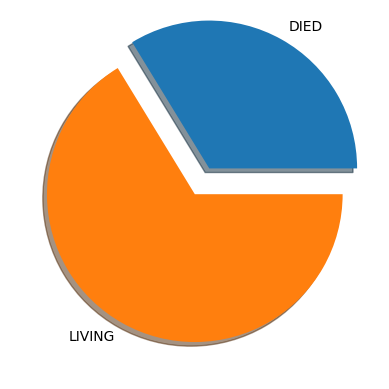

In [19]:
#Columns with age above 50 with living case to death case ratio
age_above_50_not_died = df['DEATH_EVENT'][df.age >=50][df.DEATH_EVENT == 0]
age_above_50_died = df['DEATH_EVENT'][df.age >= 50][df.DEATH_EVENT == 1]

len_died = len(age_above_50_died)
len_not_died = len(age_above_50_not_died)

arr1 = np.array([len_died, len_not_died])
labels =['DIED','LIVING']

print(f'Total number of Died:- {len_died}')
print(f'Total number of living:- {len_not_died}')

plt.pie(arr1, labels=labels, explode = [0.2, 0.0], shadow= True)
plt.show()

Total number of Died with high bp:- 39
Total number of Not died with high bp: 137


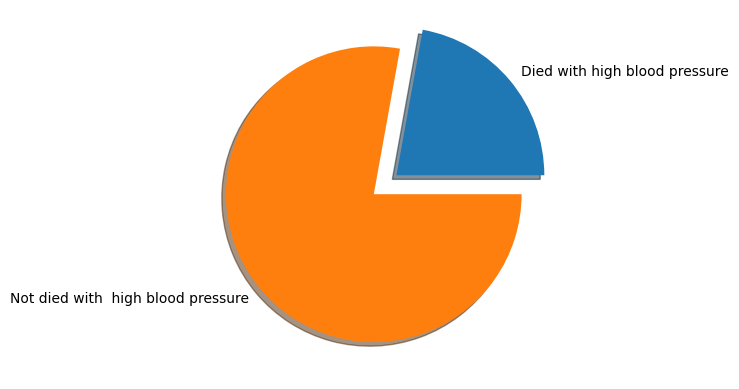

In [21]:
#Plot of patients who died with high blood pressure vs patients who did not die with high bp
patient_nhave_diabetes_0 = df['DEATH_EVENT'][df.high_blood_pressure == 0][df.DEATH_EVENT ==0]
patient_have_diabetes_1 = df['DEATH_EVENT'][df.high_blood_pressure == 1][df.DEATH_EVENT == 1]

len_d_died = len(patient_have_diabetes_1)
len_d_alive = len(patient_nhave_diabetes_0)

arr2 = np.array([len_d_died, len_d_alive])
labels = ['Died with high blood pressure', 'Not died with  high blood pressure']

print(f'Total number of Died with high bp:- {len_d_died}')
print(f'Total number of Not died with high bp: {len_d_alive}')

plt.pie(arr2, labels=labels, explode = [0.2,0.0], shadow = True)
plt.show()

Total number of Died with diabetes:- 40
Total number of Not died with diabetes: 118


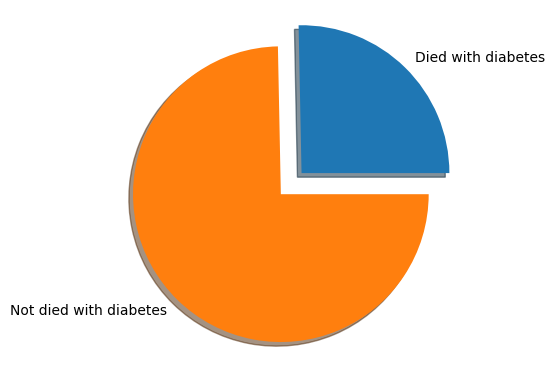

In [23]:
#Plot of patients who died with diabetes vs patients who did not die with high blood pressure
patient_nhave_diabetes_0 = df['DEATH_EVENT'][df.diabetes == 0][df.DEATH_EVENT ==0]
patient_have_diabetes_1 = df['DEATH_EVENT'][df.diabetes == 1][df.DEATH_EVENT == 1]

len_d_died = len(patient_have_diabetes_1)
len_d_alive = len(patient_nhave_diabetes_0)

arr2 = np.array([len_d_died, len_d_alive])
labels = ['Died with diabetes', 'Not died with diabetes']

print(f'Total number of Died with diabetes:- {len_d_died}')
print(f'Total number of Not died with diabetes: {len_d_alive}')

plt.pie(arr2, labels=labels, explode = [0.2,0.0], shadow = True)
plt.show()

In [27]:
df.corr().style.background_gradient(cmap='coolwarm')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [30]:
X = df.drop('DEATH_EVENT', axis = 1)
y = df['DEATH_EVENT']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

print(f'Shape of the X_train {X_train.shape}')
print(f'Shape of the X_test {X_test.shape}')
print(f'Shape of the y_train {y_train.shape}')
print(f'Shape of the y_test {y_test.shape}')

Shape of the X_train (239, 12)
Shape of the X_test (60, 12)
Shape of the y_train (239,)
Shape of the y_test (60,)


In [33]:
def add_interactions(X):
    features = X.columns
    m = len(features)
    X_int = X.copy(deep = True)
    
    for i in range(m):
        feature_i_name = features[i]
        feature_i_data = X[feature_i_name]
        
        for j in range(i+1, m):
            feature_j_name = features[j]
            feature_j_data = X[feature_j_name]
            feature_i_j_name = feature_i_name + '_X_' + feature_j_name
            X_int[feature_i_j_name] = feature_i_data * feature_j_data
    return X_int
X_train_mod = add_interactions(X_train)
X_test_mod = add_interactions(X_test)

In [34]:
X_train_mod

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,...,serum_creatinine_X_serum_sodium,serum_creatinine_X_sex,serum_creatinine_X_smoking,serum_creatinine_X_time,serum_sodium_X_sex,serum_sodium_X_smoking,serum_sodium_X_time,sex_X_smoking,sex_X_time,smoking_X_time
6,75.000,1,246,0,15,0,127000.00,1.20,137,1,...,164.40,1.20,0.0,12.00,137,0,1370,0,10,0
183,75.000,0,99,0,38,1,224000.00,2.50,134,1,...,335.00,2.50,0.0,405.00,134,0,21708,0,162,0
185,60.667,1,104,1,30,0,389000.00,1.50,136,1,...,204.00,1.50,0.0,256.50,136,0,23256,0,171,0
146,52.000,0,132,0,30,0,218000.00,0.70,136,1,...,95.20,0.70,0.7,78.40,136,136,15232,1,112,112
30,94.000,0,582,1,38,1,263358.03,1.83,134,1,...,245.22,1.83,0.0,49.41,134,0,3618,0,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,60.667,1,151,1,40,1,201000.00,1.00,136,0,...,136.00,0.00,0.0,172.00,0,0,23392,0,0,0
71,58.000,0,582,1,35,0,122000.00,0.90,139,1,...,125.10,0.90,0.9,63.90,139,139,9869,1,71,71
106,55.000,0,748,0,45,0,263000.00,1.30,137,1,...,178.10,1.30,0.0,114.40,137,0,12056,0,88,0
270,44.000,0,582,1,30,1,263358.03,1.60,130,1,...,208.00,1.60,1.6,390.40,130,130,31720,1,244,244


In [35]:
X_test_mod

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,...,serum_creatinine_X_serum_sodium,serum_creatinine_X_sex,serum_creatinine_X_smoking,serum_creatinine_X_time,serum_sodium_X_sex,serum_sodium_X_smoking,serum_sodium_X_time,sex_X_smoking,sex_X_time,smoking_X_time
281,70.0,0,582,0,40,0,51000.00,2.70,136,1,...,367.20,2.70,2.70,675.00,136,136,34000,1,250,250
265,50.0,1,298,0,35,0,362000.00,0.90,140,1,...,126.00,0.90,0.90,216.00,140,140,33600,1,240,240
164,45.0,0,2442,1,30,0,334000.00,1.10,139,1,...,152.90,1.10,0.00,141.90,139,0,17931,0,129,0
9,80.0,1,123,0,35,1,388000.00,9.40,133,1,...,1250.20,9.40,9.40,94.00,133,133,1330,1,10,10
77,42.0,0,102,1,40,0,237000.00,1.20,140,1,...,168.00,1.20,0.00,88.80,140,0,10360,0,74,0
278,50.0,1,1051,1,30,0,232000.00,0.70,136,0,...,95.20,0.00,0.00,172.20,0,0,33456,0,0,0
93,60.0,1,154,0,25,0,210000.00,1.70,135,1,...,229.50,1.70,0.00,139.40,135,0,11070,0,82,0
109,45.0,0,292,1,35,0,850000.00,1.30,142,1,...,184.60,1.30,1.30,114.40,142,142,12496,1,88,88
5,90.0,1,47,0,40,1,204000.00,2.10,132,1,...,277.20,2.10,2.10,16.80,132,132,1056,1,8,8
173,50.0,1,115,0,20,0,189000.00,0.80,139,1,...,111.20,0.80,0.00,116.80,139,0,20294,0,146,0


In [44]:
def evaluating_model(y_test, y_pred):
    '''
    Function for evaliating our models
    '''
    print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
    print(f'Precision Score: {precision_score(y_test,y_pred)}')
    print(f'Recall Score: {recall_score(y_test,y_pred)}')
    print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')

In [45]:

lr_model_pip = make_pipeline(StandardScaler(), LogisticRegression())
lr_model_pip.fit(X_train, y_train)

y_pred1 = lr_model_pip.predict(X_test)
evaluating_model(y_test, y_pred1)

Accuracy Score: 0.8
Precision Score: 0.9333333333333333
Recall Score: 0.56
Confusion Matrix: 
[[34  1]
 [11 14]]


In [46]:
from xgboost import XGBClassifier

xgb1 = XGBClassifier(colsample_bytree = 1.0, 
                    learning_rate = 0.1,
                    max_depth = 4,
                    n_estimators = 4,
                    subsample = 1.0)

eval_set = [(X_test, y_test)]
xgb1.fit(X_train, y_train, early_stopping_rounds = 10, eval_metric = 'logloss', eval_set = eval_set, verbose = True)

[0]	validation_0-logloss:0.67205
[1]	validation_0-logloss:0.64112
[2]	validation_0-logloss:0.61754
[3]	validation_0-logloss:0.60047


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=4, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [48]:
pred = xgb1.predict(X_test)
evaluating_model(y_test, pred)

Accuracy Score: 0.6666666666666666
Precision Score: 0.8571428571428571
Recall Score: 0.24
Confusion Matrix: 
[[34  1]
 [19  6]]


In [65]:
#Saving best model
model = lr_model_pip

In [70]:
input_data = (50,1,159,1,30,0,302000,1.2,138,0,0,29)

In [73]:
# changing the input data to numpy array
input_data_as_np_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_np_array.reshape(1, -1)



prediction = model.predict(input_data_reshaped)
print(prediction)
if (prediction[0] == 0):
    print('Patient will most likely not die from heart failure disease')
else:
    print('Patient will most likely die from heart failure disease.')

[0]
Patient will most likely not die from heart failure disease
